In [12]:
def beta(u, v):
    '''Takes in two 2n dimensional vectors over F_2, and outputs a 0 or 1.'''
    
    if len(u) != len(v) or len(u) % 2 != 0: 
        raise Exception('Input vectors need to have equal and even dimension.')
    
    B = 0
    for i in range(0, len(u), 2): 
        B += u[i] * v[i + 1] - u[i + 1] * v[i]
    
    return B


def conlon_ferber(n):
    '''Returns the Conlon-Ferber graph on F_2^n - {0}'''
    
    if n % 2 != 0:
        raise Exception('Conlon-Ferber graph must be defined on an even dimension.')

    V = list(VectorSpace(GF(2), n))
    V.remove(vector(GF(2), [0] * n))

    for vec in V: vec.set_immutable()
   
    Vectors_e = [x for i,x in enumerate(V)]
    
    return Graph([V, lambda u, v: beta(u, v) == 1], loops = False)

 
# given a vector, return the index number

def return_index(v):
    for i in range(len(Vertex)):
        if Vertex[i] == v:
            return i
        



In [13]:
from sage.graphs.independent_sets import IndependentSets

G = conlon_ferber(8)


In [7]:
from sage.graphs.independent_sets import IndependentSets
def ILP_small_independent_sets(G,k):
    Im = IndependentSets(G, maximal=True)
    maximals = [x for i,x in enumerate(Im)]


    p = MixedIntegerLinearProgram()
    T = p.new_variable(binary=True)
    p.set_objective(p.sum(T[i] for i in G.vertices()))

    for m in maximals:
        p.add_constraint(p.sum(T[i] for i in m) <= k)

    print(round(p.solve()))
     = p.get_values(T)

    G_subgraph = G.copy()
    for i in range(len(G.vertices())):
        if T[Vertex[i]] == 0:
            G_subgraph.delete_vertex(Vertex[i])
            
    G_subgraph.show()


    print("number of veritces: " ,len(G_subgraph.vertices()))
    print("clique:", G_subgraph.clique_number())
    print("independent set : " , len(G_subgraph.independent_set()))
    
    return G_subgraph



In [15]:

def ILP_small_cliques(G,k):

    G_comp = G.complement()
    Vertex = [x for i,x in enumerate(G.vertices())]

    Im = IndependentSets(G_comp, maximal=True)
    maximals = [x for i,x in enumerate(Im)]
    
    p = MixedIntegerLinearProgram()
    T = p.new_variable(binary=True)
    p.set_objective(p.sum(T[i] for i in G_comp.vertices()))
 

    for m in maximals:
        p.add_constraint(p.sum(T[i] for i in m) <= k)

    print(round(p.solve()))
    T = p.get_values(T)


    G_comp_subgraph = G_comp.copy()
    
    for i in range(len(G_comp.vertices())):
        if T[Vertex[i]] == 0:
            G_comp_subgraph.delete_vertex(Vertex[i])


    G_comp_subgraph.show()
    print("Clique Number:", G_comp_subgraph.clique_number())
    print("Independent Set:", len(G_comp_subgraph.independent_set()))

# R(4,4,17)

51.0


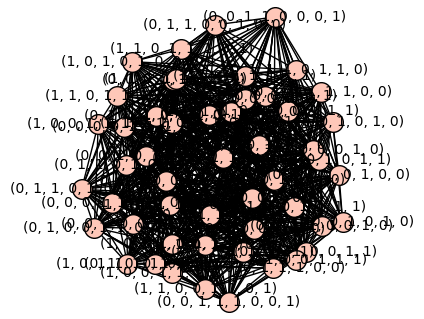

number of veritces:  51
clique: 7
independent set :  3
17.0


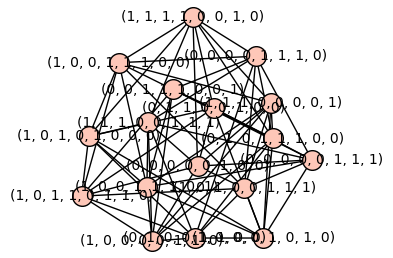

3
3


In [16]:
# R(4,4,17)

G = conlon_ferber(8)
G_ = ILP_small_independent_sets(G,3)
C = ILP_small_cliques(G_,3)

# R(4,5,21)


51.0


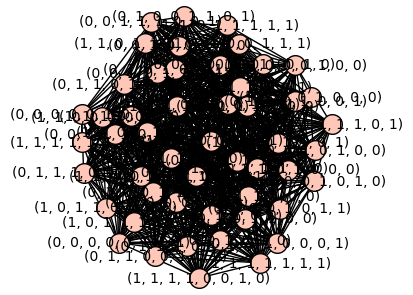

number of veritces:  51
clique: 7
independent set :  3
21.0


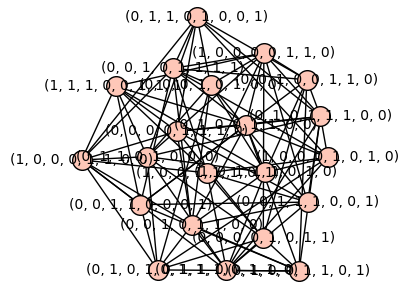

3
4


In [17]:
G = conlon_ferber(8)
G_ = ILP_small_independent_sets(G,3)
C = ILP_small_cliques(G_,4)